In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
tf.__version__

'1.13.1'

### 텐서플로우 기본

In [42]:
# building a tensorflow graph 모델 생성만 한 상태
a = tf.add(3, 5)
print(a) 

Tensor("Add_1:0", shape=(), dtype=int32)


In [43]:
# executing the tensorflow graph (ver2에서는 생략 가능)
sess = tf.Session()
print(sess.run(a))

8


In [44]:
# session close
sess.close()

In [45]:
# close문 없이 사용 후 알아서 종료
with tf.Session() as sess:
    print(sess.run(a))

8


<br>

In [49]:
x = 2
y = 3
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
useless = tf.multiply(x, op1) # 사용되지 않음
op3 = tf.pow(op2, op1)

In [50]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    # 연결된 모든 tensor들 함께 실행됨(op1, op2)
    
    # 여러 tesor 실행시키고 싶을 때
    # op3, useless = sess.run([op3, useless])
    print(op3)

7776


<br>

### 데이터 준비

In [7]:
x_data = datasets.load_boston().data[:, 12] # 1) 모델에 넣기 전 차원 변경
# 2) 12:13 행렬 형태로 꺼냄
y_data = datasets.load_boston().target

df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


<br>

## 선형 회귀 (Linear Regression)

#### build themodel

In [8]:
# tf.Variable(초기화 방법)
# parameter theta / gradient descent 대상 / learning 대상

w = tf.Variable(tf.random_normal([1])) # θ 초기화 - 정규분포로부터 랜덤으로 데이터를 꺼냄
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b
# 예측된 집값 y = θ1* x + θ0, θ1 == w /  θ0 == b

Instructions for updating:
Colocations handled automatically by placer.


#### set the criterion - cost function & gradient descent method

In [11]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # MSE 직접 작성

# vanilla gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.001) # learning rate(step), θ가 바뀌는 보폭
train = optimizer.minimize(loss)

#### train the model

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 전체 코드의 tf.Variables criterion 기준 초기화
    
    for step in range(10000): # 1 epoch
        sess.run(train) # gradient descent
        
        if step % 1000 == 0:
            # 학습에 전혀 상관없이 값을 확인하기 위한 run
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b]) # 9999번째 값

Step 0: w [0.5153615] b [0.32759184]
loss 393.77178955078125

Step 1000: w [0.31912354] b [13.414074]
loss 146.27793884277344

Step 2000: w [-0.16533798] b [21.483427]
loss 79.69052124023438

Step 3000: w [-0.46487257] b [26.472576]
loss 54.2357292175293

Step 4000: w [-0.6500717] b [29.557312]
loss 44.504886627197266

Step 5000: w [-0.76457703] b [31.464552]
loss 40.78501510620117

Step 6000: w [-0.83537406] b [32.643772]
loss 39.36298370361328

Step 7000: w [-0.87914675] b [33.372864]
loss 38.81938552856445

Step 8000: w [-0.90621144] b [33.82366]
loss 38.611568450927734

Step 9000: w [-0.9229441] b [34.102367]
loss 38.532135009765625



#### visualize the result

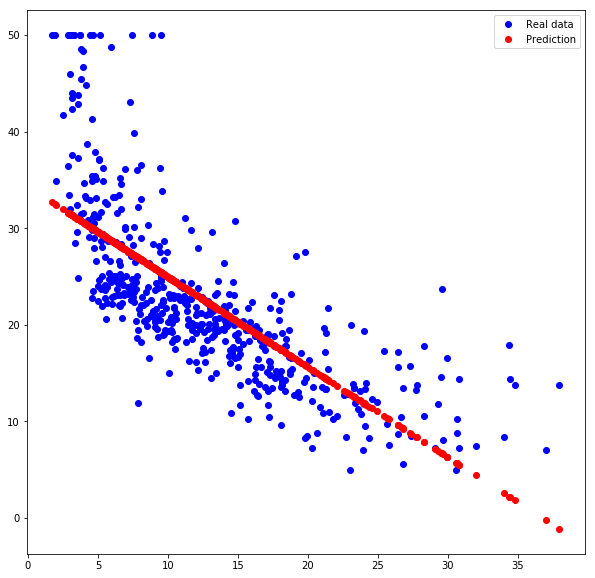

In [15]:
plt.figure(figsize = (10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction') # pred
plt.legend()
plt.show()

<br>

## 인공 신경망 (Regression with Neural Network)

![image](image/KakaoTalk_20210715_131140671.jpg)

### ver1. 
#### 1-1) build the model

In [21]:
_x_data = tf.reshape(x_data, [len(x_data), 1]) # 하나의 리스트[506, ] -> 행렬로 차원 변경 [506, 1]

W = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([5, 1], dtype = tf.float64)) # ouput layer의 열의 수는 정답 데이터(y)의 열의 수

# activation func -> hidden layer
hidden = tf.nn.sigmoid(tf.matmul(_x_data, W))
 
# hidden layer -> output layer(y)
output = tf.matmul(hidden, W_out)

#### 1-2) set the criterion

In [22]:
loss = tf.reduce_mean(tf.square(output - y_data)) # MSE 직접 작성
optimizer = tf.train.GradientDescentOptimizer(0.001) # learning rate(step)
train = optimizer.minimize(loss)

#### 1-3) train the model

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 전체 코드의 tf.Variables criterion 기준 초기화
    
    for step in range(50000):
        sess.run(train)
        
        if step % 5000 == 0:
            print('Setp {} || Loss : {}'.format(step, sess.run(loss)))
            
    output = sess.run(output)

![result](image.png)

-> error

#### 1-4) visualize the result

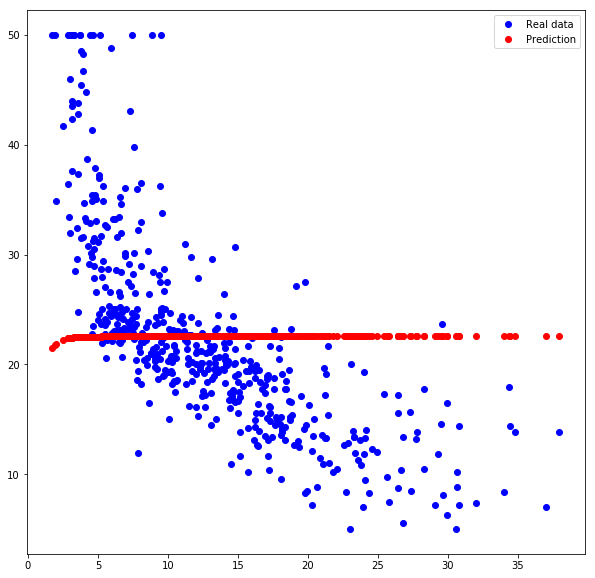

In [27]:
plt.figure(figsize = (10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction') # pred
plt.legend()
plt.show()

<br>

### ver2. hidden layer 추가
#### 2-1) build the model (2 hidden layer)

In [28]:
_x_data = tf.reshape(x_data, [len(x_data), 1]) # 하나의 리스트[506, ] -> 행렬로 차원 변경 [506, 1]

W1 = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
 
output = tf.matmul(hidden2, W_out)

#### 2-2) set the criterion

In [31]:
loss = tf.reduce_mean(tf.square(output - y_data)) # output [506, 1] - y_data [506, ]
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

#### 2-3) train the model

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(50000):
        sess.run(train)
        
        if step % 5000 == 0:
            print('Setp {} || Loss : {}'.format(step, sess.run(loss)))
            
    output = sess.run(output)

Setp 0 || Loss : 3742.106492902594
Setp 5000 || Loss : 84.44023160353932
Setp 10000 || Loss : 84.42328129730059
Setp 15000 || Loss : 84.42003096374305
Setp 20000 || Loss : 84.41965968030065
Setp 25000 || Loss : 84.4195829437444
Setp 30000 || Loss : 84.4195749507798
Setp 35000 || Loss : 84.4195781692564
Setp 40000 || Loss : 84.41957181707072
Setp 45000 || Loss : 84.4195709996405


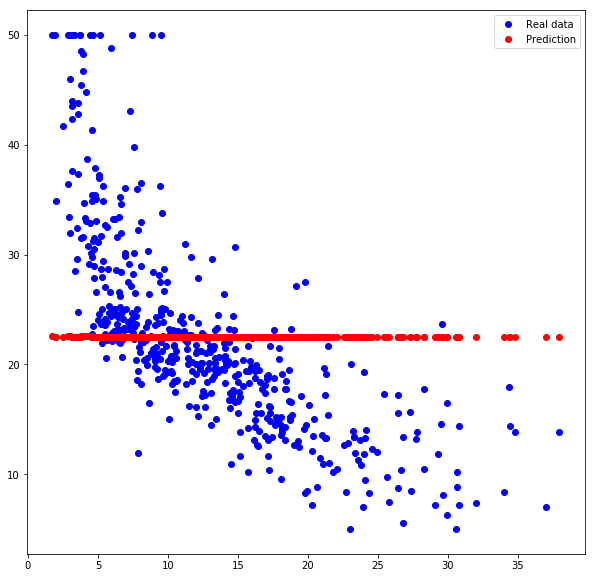

In [33]:
plt.figure(figsize = (10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction') # pred
plt.legend()
plt.show()

<br>

### ver3. loss 계산 시 행렬 맞춤, MSE 라이브러리
#### 3-1) built the model

In [36]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(x_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
 
output = tf.matmul(hidden2, W_out)

#### 3-2) set the criterion

In [39]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


#### 3-3) train the model

In [40]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(50000):
        sess.run(train)
        
        if step % 5000 == 0:
            print('Setp {} || Loss : {}'.format(step, sess.run(loss)))
            
    output = sess.run(output)

Setp 0 || Loss : 1900.6029052734375
Setp 5000 || Loss : 31.276294708251953
Setp 10000 || Loss : 26.27071762084961
Setp 15000 || Loss : 26.15706443786621
Setp 20000 || Loss : 26.108488082885742
Setp 25000 || Loss : 26.0991153717041
Setp 30000 || Loss : 26.098718643188477
Setp 35000 || Loss : 26.098358154296875
Setp 40000 || Loss : 26.098079681396484
Setp 45000 || Loss : 26.097806930541992


#### 3-4) visualize the result

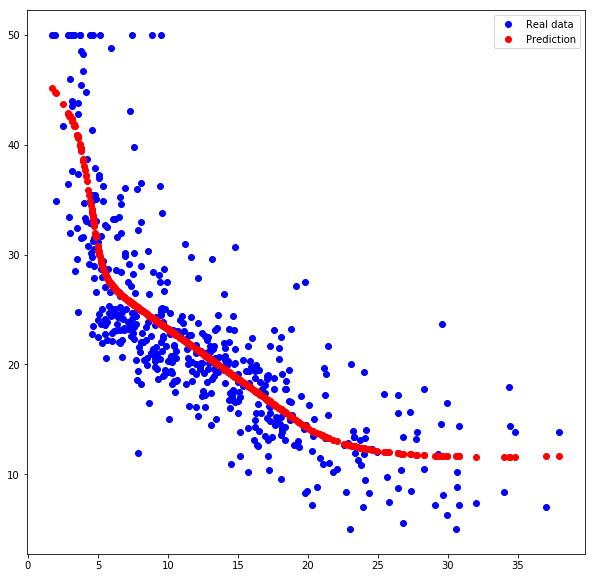

In [41]:
plt.figure(figsize = (10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction') # pred
plt.legend()
plt.show()

<br>

## TensorFlow - Placeholders

새로운 데이터에 대한 대응

In [ ]:
# 예)
tf.placeholder(tf.int64, shape=(500, 10)) # 행열 수 미리 지정
tf.placeholder(tf.int64, shape=(None, 10)) # 행의 수 지정x (권장, batch size 고려) / 열의 수는 고정